In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.linalg import inv
from numpy import matmul

data_url = "http://lib.stat.cmu.edu/datasets/boston"
header = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
df = pd.DataFrame(np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]]), columns=header)

# Part (A) Simple linear regression

Beta0 = 34.55
Beta1 = -0.95


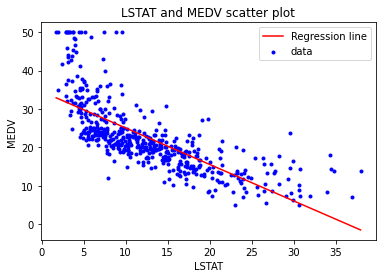

95% confidence interval of beta0 = [33.45,35.66]
95% confidence interval of beta1 = [-1.03,-0.87]
95% confidence interval of expected MEDV for LSTAT = 4 is [29.90,31.61]
95% prediction interval of MEDV for LSTAT = 4 is [18.51,43.00]
95% confidence interval of expected MEDV for LSTAT = 10 is [24.47,25.63]
95% prediction interval of MEDV for LSTAT = 10 is [12.83,37.28]
95% confidence interval of expected MEDV for LSTAT = 14 is [20.70,21.81]
95% prediction interval of MEDV for LSTAT = 14 is [9.03,33.48]


In [2]:
X = np.array(df.LSTAT).reshape(-1,1)
y = df.MEDV
reg = LinearRegression().fit(np.array(X), y)
beta0 = reg.intercept_
beta1 = reg.coef_[0]
print(f'Beta0 = {beta0:.2f}')
print(f'Beta1 = {beta1:.2f}')

plt.scatter(X, y, c='b', marker='.', label='data')
xx = np.linspace(X.min(), X.max(), 100)
yy = beta1*xx + beta0
plt.plot(xx, yy, 'r-', label='Regression line')
plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('LSTAT and MEDV scatter plot')
plt.show()

n = len(X)
yhat = reg.predict(X)
RSS = ((y-yhat)**2).sum()
s = (RSS/(n-2))**(1/2)
xbar = X.mean()
SSRx = ((X-xbar)**2).sum()
ci_beta1 = [beta1-t.ppf(0.975,n-2)*s/SSRx**(1/2), beta1+t.ppf(0.975,n-2)*s/SSRx**(1/2)]
ci_beta0 = [beta0-t.ppf(0.975,n-2)*s*(1/n+xbar**2/SSRx)**(1/2), beta0+t.ppf(0.975,n-2)*s*(1/n+xbar**2/SSRx)**(1/2)]

print(f'95% confidence interval of beta0 = [{ci_beta0[0]:.2f},{ci_beta0[1]:.2f}]')
print(f'95% confidence interval of beta1 = [{ci_beta1[0]:.2f},{ci_beta1[1]:.2f}]')

xxp = [4,10,14]
ybarhat = reg.predict(np.array(xxp).reshape(-1,1))
XX = np.concatenate([np.ones((506,1)),X], axis=1)
XXI = inv(matmul(XX.T,XX))
p = 1

for idx, value in enumerate(xxp):
    x = np.array([1,value])
    ci_ybar = [ybarhat[idx]-t.ppf(0.975,n-p-1)*s*(matmul(matmul(x,XXI),x.T))**(1/2), ybarhat[idx]+t.ppf(0.975,n-p-1)*s*(matmul(matmul(x,XXI),x.T))**(1/2)]
    pi_ybar = [ybarhat[idx]-t.ppf(0.975,n-p-1)*s*(matmul(matmul(x,XXI),x.T)+1)**(1/2), ybarhat[idx]+t.ppf(0.975,n-p-1)*s*(matmul(matmul(x,XXI),x.T)+1)**(1/2)]
    print(f'95% confidence interval of expected MEDV for LSTAT = {value} is [{ci_ybar[0]:.2f},{ci_ybar[1]:.2f}]')
    print(f'95% prediction interval of MEDV for LSTAT = {value} is [{pi_ybar[0]:.2f},{pi_ybar[1]:.2f}]')

# Part (B) Multiple linear regression

In [3]:
X = np.array(df[['LSTAT','AGE']])
y = df.MEDV
reg = LinearRegression().fit(np.array(X), y)
beta0 = reg.intercept_
beta1 = reg.coef_[0]
beta2 = reg.coef_[1]
print(f'Beta0 = {beta0:.2f}')
print(f'Beta1 = {beta1:.2f}')
print(f'Beta2 = {beta2:.2f}')

yhat = reg.predict(X)
ybar = y.mean()
TSS = ((y-ybar)**2).sum()
SSR = ((yhat-ybar)**2).sum()
SSE = ((y-yhat)**2).sum()
Rsquared = 1 - SSE/TSS
print(f'R^2 = {Rsquared:.2f}')

Beta0 = 33.22
Beta1 = -1.03
Beta2 = 0.03
R^2 = 0.55
